# Huidkanker Opsporen met Machine Learning

Huidkanker is een van de meest voorkomende vormen van kanker wereldwijd, en vroege detectie is belangrijk voor een betere overlevings kans. Dermatologen vertrouwen op visuele inspectie en biopsieën om huidkanker te diagnosticeren, maar deze manier kan tijdrovend en foutgevoelig zijn. Met de opkomst van kunstmatige intelligentie (AI) en diepe neurale netwerken, zoals convolutionele neurale netwerken (CNN's), is er een nieuwe mogelijkheid om huidkanker sneller en misschien wel nauwkeuriger te detecteren.

In dit project trainen we een machine learning-model, om huidkanker automatisch te herkennen aan de hand van afbeeldingen van huidlaesies. Door een dataset van medische beelden te gebruiken, ontwikkelen we een model dat onderscheid kan maken tussen kwaadaardige en goedaardige huidafwijkingen. Dit onderzoek heeft als doel om bij te dragen aan een efficiënter en betrouwbaarder hulpmiddel voor medische professionals in de strijd tegen huidkanker.

### Over de data
Voor dit onderzoek maak ik gebruik van De HAM1000-dataset. De HAM10000-dataset is een verzameling van 10.015 afbeeldingen van huidafwijkingen die is ontwikkeld om een belangrijk probleem in machine learning op te lossen: het tekort aan grote en diverse datasets voor het automatisch diagnosticeren van huidlaesies. Deze dataset helpt onderzoekers om betere modellen te ontwikkelen.

#### Categorieen huidafwijkingen in de dataset

De dataset bevat afbeeldingen van belangrijke huidafwijkingen, waaronder:

- **akiec**: Voorstadia van huidkanker  
- **bcc**: Basaalcelkanker  
- **bkl**: Goedaardige huidvlekken zoals ouderdomsvlekken  
- **df**: Dermatofibroom (goedaardige huidknobbels)  
- **mel**: Melanoom (gevaarlijke huidkanker)  
- **nv**: Moedervlekken  
- **vasc**: Vasculaire afwijkingen zoals angiomen (bloedvatgezwellen)

Later word hier meer over verteld

---

#### Betrouwbaarheid

- Meer dan de helft van de diagnoses is bevestigd met **histopathologie**, de gouden standaard op dit gebied.  
- De rest van de diagnoses is gecontroleerd door:
  - Vervolgonderzoeken  
  - Consensus van experts  
  - Geavanceerde microscopie  


### Categorieën van gepigmenteerde huidlaesies uitgelegd

De HAM10000-dataset bevat zeven  diagnostische categorieën van gepigmenteerde huidlaesies. Hieronder worden deze categorieën toegelicht:

---

#### 1. Actinische keratosen en intra-epitheliaal carcinoom (akiec)
- **Beschrijving**:  
  Actinische keratosen zijn ruwe, schilferige plekken op de huid veroorzaakt door langdurige blootstelling aan de zon. Ze worden beschouwd als precancereuze laesies, omdat ze kunnen uitgroeien tot plaveiselcelcarcinoom.  
  Bowen's disease is een vroege vorm van huidkanker die beperkt blijft tot de bovenste huidlaag.  

---

#### 2. Basaalcelcarcinoom (bcc)
- **Beschrijving**:  
  Basaalcelcarcinoom is de meest voorkomende vorm van huidkanker. Het groeit langzaam en verspreidt zich zelden, maar kan lokaal gevaarlijk zijn.  
  Het lijkt vaak op een glanzende, parelachtige knobbel of een licht schilferige plek, meestal op aan de zon blootgestelde huid zoals het gezicht.

---

#### 3. Goedaardige keratose-achtige laesies (bkl)
- **Beschrijving**:  
  Deze categorie omvat niet-kwaadaardige huidlaesies die op keratose lijken, waaronder:  
  - **Solar lentigines**: Bruine vlekken door blootstelling aan UV-straling.  
  - **Seborrheic keratoses**: Wasachtige, op de huid geplakte goedaardige gezwellen.  
  - **Lichen-planus keratoses**: Ontstekingsgerelateerde ruwe plekken.  
  Meestal zijn ze onschuldig, maar kunnen lijken op kwaadaardige laesies en vereisen soms nader onderzoek.

---

#### 4. Dermatofibroom (df)
- **Beschrijving**:  
  Een dermatofibroom is een goedaardige, harde huidknobbel die vaak ontstaat door een overreactie van bindweefsel na een klein trauma, zoals een insectenbeet.  
  Het voelt stevig aan, heeft een roodbruine kleur en is meestal pijnloos.

---

#### 5. Melanoom (mel)
- **Beschrijving**:  
  Melanoom is de meest ernstige vorm van huidkanker. Het ontstaat in melanocyten, de pigmentproducerende cellen van de huid.  
  Melanoom kan snel groeien en uitzaaien naar andere delen van het lichaam, wat levensbedreigend is.  
  Het heeft een nregelmatige vorm, kleurvariatie en veranderingen in grootte.

---

#### 6. Melanocytaire naevi (nv)
- **Beschrijving**:  
  Melanocytaire naevi zijn goedaardige moedervlekken, gevormd door clusters van melanocyten. Ze variëren in grootte, vorm en kleur.  
  Meestal symmetrisch, met gladde randen en een uniforme kleur.

---

#### 7. Vasculaire laesies (vasc)
- **Beschrijving**:  
  Vasculaire laesies zijn goedaardige afwijkingen die uit bloedvaten bestaan, waaronder:  
  - **Angiomen**: Kleine, rode of paarse bloedvatgezwellen.  
  - **Angiokeratomen**: Vergrote bloedvaten met een schilferig oppervlak.  
  - **Pyogene granulomen**: Roodbruine gezwellen die vaak ontstaan na huidtrauma.  
  - **Hemorrhage (bloedingen)**: Ophopingen van bloed onder de huid door verwondingen.  
  Herkenbaar aan hun rode, paarse of blauwe kleur.

---


# Exploratory Data Analysis (EDA) voor Huidkankerdiagnose Dataset

## Packages die in deze Analyse Gebruikt worden

Hier is een overzicht van de packages die ik gebruikt heb in dit onderzoek, inclusief hun toepassingen:

- **`pandas`**: Voor het inlezen, manipuleren en analyseren van tabulaire data.
- **`numpy`**: Voor wiskundige bewerkingen en het werken met arrays.
- **`matplotlib`** en **`seaborn`**: Voor het visualiseren van gegevens en het genereren van grafieken.
- **`os`**: Voor het navigeren en manipuleren van bestandsstructuren.
- **`Pillow (PIL)`**: Voor het laden en verwerken van afbeeldingsbestanden.
- **`scikit-learn`**: Voor dataset-splitsing, evaluatie, en andere machine learning-methoden.
- **`tensorflow`** en **`keras`**: Voor deep learning-modelarchitecturen, training en evaluatie.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model


### Data Importeren en Basisverkenning

We beginnen met het laden van de dataset en onderzoeken de structuur, kenmerken en eerste paar rijen om inzicht te krijgen in de beschikbare data.

In [4]:
bestand = '/students/2023-2024/Thema07/rumen_reactor/test/HAM10000_metadata.csv'


df = pd.read_csv(bestand)

print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


### Head van de Metadata

De **`head()`** van je metadata toont de eerste vijf rijen van de dataset. Elke rij bevat gegevens over een huidaandoening, waarbij de kolommen de volgende informatie bevatten:

1. **`lesion_id`**: Een unieke identificatiecode voor de huidlesie, bijvoorbeeld `HAM_0000118`. 
2. **`image_id`**: De identificatiecode van de afbeelding die de huidlesie vertegenwoordigt, bijvoorbeeld `ISIC_0027419`.
3. **`dx`**: De diagnosecode van de aandoening, in dit geval wordt de code `bkl` gebruikt, wat staat voor "benigne keratose".
4. **`dx_type`**: De bron of het type van de diagnose, bijvoorbeeld `histo` (histopathologisch).
5. **`age`**: De leeftijd van de patiënt, bijvoorbeeld 80 jaar.
6. **`sex`**: Het geslacht van de patiënt.
7. **`localization`**: De locatie van de huidlesie, zoals `scalp` (scalp) of `ear` (oor).



De onderstaande stuk code zorgt ervoor dat de padlocaties van de afbeeldingsbestanden worden toegevoegd aan je DataFrame df:

In [5]:
image_base_path = '/students/2023-2024/Thema07/rumen_reactor/test/images'

image_paths = []

for _, row in df.iterrows():
    image_id = row['image_id']
    
    part_1_path = os.path.join(image_base_path, 'part_1', f'{image_id}.jpg')
    part_2_path = os.path.join(image_base_path, 'part_2', f'{image_id}.jpg')
    
    if os.path.exists(part_1_path):
        image_paths.append(part_1_path)
    elif os.path.exists(part_2_path):
        image_paths.append(part_2_path)
    else:
        image_paths.append(None)

df['image_path'] = image_paths

print(df.head())


     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  
0  /students/2023-2024/Thema07/rumen_reactor/test...  
1  /students/2023-2024/Thema07/rumen_reactor/test...  
2  /students/2023-2024/Thema07/rumen_reactor/test...  
3  /students/2023-2024/Thema07/rumen_reactor/test...  
4  /students/2023-2024/Thema07/rumen_reactor/test...  


Hierboven zie je dat de juiste padlocaties correct aan de bijbehorende afbeeldingen zijn toegevoegd.

In de onderstaande stuk code wordt een dictionary lesion_type_dict gedefinieerd die de codes voor verschillende huidaandoeningen (zoals 'nv', 'mel', 'bkl', etc.) mappt naar hun volledige benamingen (zoals 'Melanocytic nevi', 'Melanoma', enzovoort)

In [6]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 

In de onderstaande stuk code wordt de dx kolom omgezet naar een categorische variabele.
Zodat het beter in de machine learning algoritme werkt.

In [7]:
df['dx_index'] = df['dx'].astype('category').cat.codes

print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  \
0  /students/2023-2024/Thema07/rumen_reactor/test...   
1  /students/2023-2024/Thema07/rumen_reactor/test...   
2  /students/2023-2024/Thema07/rumen_reactor/test...   
3  /students/2023-2024/Thema07/rumen_reactor/test...   
4  /students/2023-2024/Thema07/rumen_reactor/test...   

                        cell_type  dx_index  
0  Benign keratosis-like lesions          2  
1  Benign keratosis-like lesions          2  
2  Benign keratosis-like lesions          2  
3  Benign keratosis-like lesions          2  
4  Benign ke

Hierboven zie je dat zowel de **`cell_type`** als de **`dx_index`** kolommen zijn toegevoegd aan de DataFrame. De DataFrame is nu klaar voor de Exploratory Data Analysis (EDA).


In de onderstaande stuk code wordt de **`describe()`** functie gebruikt op de **`age`** kolom van de DataFrame **`df`**. 

- **Aantal (count)**: Het aantal niet-lege waarden in de **`age`** kolom.
- **Gemiddelde (mean)**: Het gemiddelde van de leeftijdswaarden.
- **Standaarddeviatie (std)**: De spreiding van de leeftijdswaarden.
- **Minimaal (min)** en **Maximaal (max)**: De laagste en hoogste leeftijd in de dataset.
- **Percentielen (25%, 50%, 75%)**: De kwartielen van de leeftijdsverdeling (waarvan de 50% de mediaan is).


Waarom je dit zou doen:
Het samenvatten van de leeftijdsgegevens is belangrijk voor een EDA. Het geeft inzicht in de leeftijdsverdeling van de patiënten en helpt bij het vinden van mogelijke trends, zoals bijvoorbeeld:
- Of er een oververtegenwoordiging is van oudere of jongere patiënten.
- Of de leeftijd een relevante factor zou kunnen zijn voor het onderzoeken van huidaandoeningen, omdat huidkanker vaker voorkomt bij oudere volwassenen.
- Of er onregelmatigheden of datakwaliteitsproblemen zijn, zoals ontbrekende of onrealistische leeftijdswaarden.




In [8]:
age_summary = df['age'].describe()
print(age_summary)

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64


- **count**: 9958 - Het aantal niet-lege waarden in de **`age`** kolom (bijvoorbeeld het aantal patiënten).
- **mean**: 51.86 - Het gemiddelde van de leeftijd van de patiënten in de dataset.
- **std**: 16.97 - De standaarddeviatie, die de spreiding van de leeftijdswaarden aangeeft.
- **min**: 0.00 - De laagste leeftijd in de dataset, wat mogelijk een fout of ontbrekende waarde is.
- **25%**: 40.00 - Het eerste kwartiel (25% van de patiënten zijn jonger dan 40 jaar).
- **50%**: 50.00 - De mediaan (50% van de patiënten zijn jonger dan 50 jaar).
- **75%**: 65.00 - Het derde kwartiel (75% van de patiënten zijn jonger dan 65 jaar).
- **max**: 85.00 - De hoogste leeftijd in de dataset.

Hoewel de **`describe()`** functie aangeeft dat de laagste waarde 0 is, en hoewel het theoretisch mogelijk is dat ook baby's huidkanker kunnen krijgen, is het onwaarschijnlijk dat er 57 gevallen zijn gezien de zeldzaamheid van deze aandoening in deze leeftijdsgroep. Daarom heb ik besloten om de ontbrekende of null-waarden in de **`age`** kolom te vervangen door de gemiddelde leeftijd van de gehele dataset, zodat ik geen data hoef te verwijderen.


In [9]:
missing_values = df.isnull().sum()
print(missing_values)

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
image_path       0
cell_type        0
dx_index         0
dtype: int64


Overigens is er hierboven te zien dat er geen andere kolom naast age null-waarden of ontbrekende gegevens bevat.

Hieronder fill ik de ages die NA zijn met de average age over de hele dataset.

In [10]:
df['age'].fillna((df['age'].mean()), inplace=True)

/tmp/ipykernel_2067669/1123070014.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna((df['age'].mean()), inplace=True)


Hieronder kijk ik of alle missing values hierdoor nu 0 zijn.

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
image_path      0
cell_type       0
dx_index        0
dtype: int64


De age-waarden zijn correct aangepast, waardoor de EDA nu kan worden voortgezet.

Hieronder tel ik het aantal voorkomens van verschillende waarden in de kolommen dx, sex, en localization van mijn DataFrame df:

In [12]:
dx_counts = df['dx'].value_counts()
sex_counts = df['sex'].value_counts()
localization_counts = df['localization'].value_counts()

print(dx_counts)


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


Er is een kans op overfitting, aangezien de dataset een sterke oververtegenwoordiging vertoont van de **nv** (Melanocytic nevi) gevallen, terwijl andere aandoeningen zoals **df** (Dermatofibroma) en **vasc** (Vascular lesions) veel minder vertegenwoordigd zijn. Dit kan ertoe leiden dat het model zich te veel richt op de oververtegenwoordigde klasse en slecht presteert op de minder vertegenwoordigde klassen. Het is belangrijk om technieken zoals *data augmentation*, *class weighting* of *undersampling* van de meerderheidsklassen te overwegen om overfitting te voorkomen en een goed gebalanceerd model te trainen.


In [13]:
print(sex_counts)

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64


De verdeling van mannen en vrouwen in deze dataset is gelijk, wat positief is omdat dit zorgt voor een evenwichtige representatie van beide geslachten. Hierdoor wordt het model niet bevooroordeeld voor een bepaald geslacht.

In [14]:
print(localization_counts)

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


Hierboven zie je de verdeling van de locaties van de foto.

Hieronder plot ik de leeftijdsverdeling van de dataset 

Text(0.5, 1.0, 'Leeftijdsverdeling')

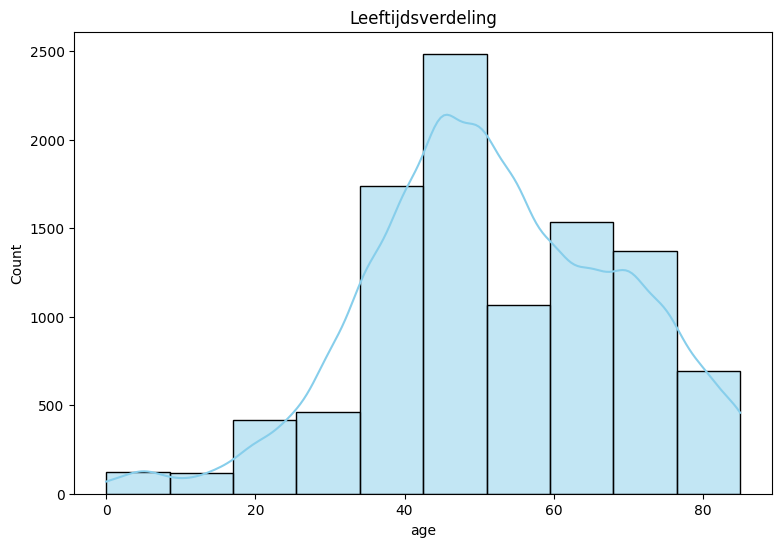

In [15]:
plt.figure(figsize=(9, 6)) 
sns.histplot(df['age'], kde=True, bins=10, color="skyblue")
plt.title("Leeftijdsverdeling")

Het grootste deel van de data bestaat uit patiënten ouder dan 30 jaar, wat theoretisch logisch is, aangezien de kans op huidkanker en het moment waarop men zich zorgen begint te maken over huidkanker, toeneemt met de leeftijd.

Hieronder plot ik de diagnose verdeling van de dataset.

/tmp/ipykernel_2067669/2829276921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=df, palette="viridis")


Text(0.5, 1.0, 'Diagnoseverdeling')

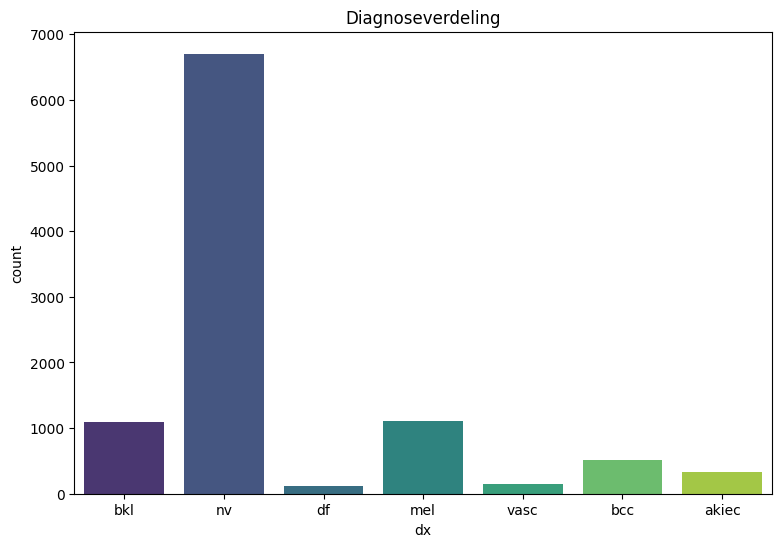

In [16]:
plt.figure(figsize=(9, 6))  
sns.countplot(x='dx', data=df, palette="viridis")
plt.title("Diagnoseverdeling")


De verdeling is inderdaad ongelijk in de dataset, wat een factor is waar ik rekening mee moet houden tijdens de training van mijn machine learning-model.

Hieronder plot ik de geslachts verdling in de dataset.

/tmp/ipykernel_2067669/1602319996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="coolwarm")


Text(0.5, 1.0, 'Geslachtsverdeling')

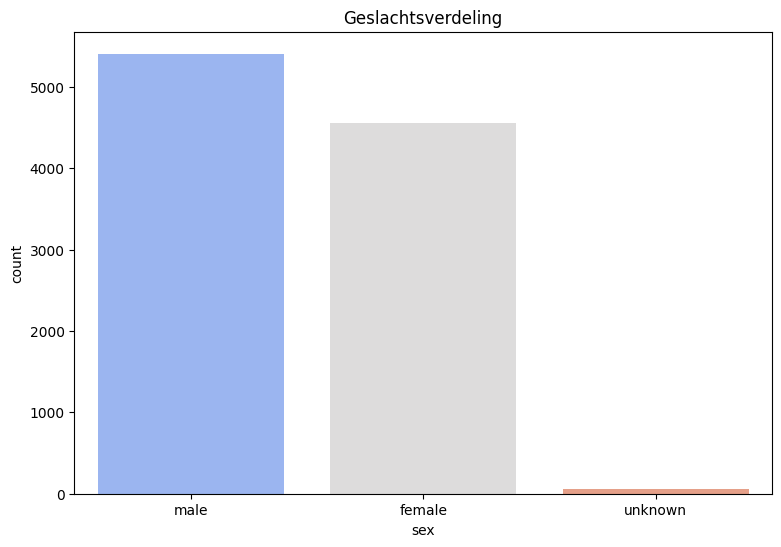

In [17]:
plt.figure(figsize=(9, 6)) 
sns.countplot(x='sex', data=df, palette="coolwarm")
plt.title("Geslachtsverdeling")

De verdeling ziet er goed gelijk uit.

Hieronder plot ik de locatie verdeling van de foto's.

/tmp/ipykernel_2067669/340515322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='localization', data=df, palette="magma")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'scalp'),
  Text(1, 0, 'ear'),
  Text(2, 0, 'face'),
  Text(3, 0, 'back'),
  Text(4, 0, 'trunk'),
  Text(5, 0, 'chest'),
  Text(6, 0, 'upper extremity'),
  Text(7, 0, 'abdomen'),
  Text(8, 0, 'unknown'),
  Text(9, 0, 'lower extremity'),
  Text(10, 0, 'genital'),
  Text(11, 0, 'neck'),
  Text(12, 0, 'hand'),
  Text(13, 0, 'foot'),
  Text(14, 0, 'acral')])

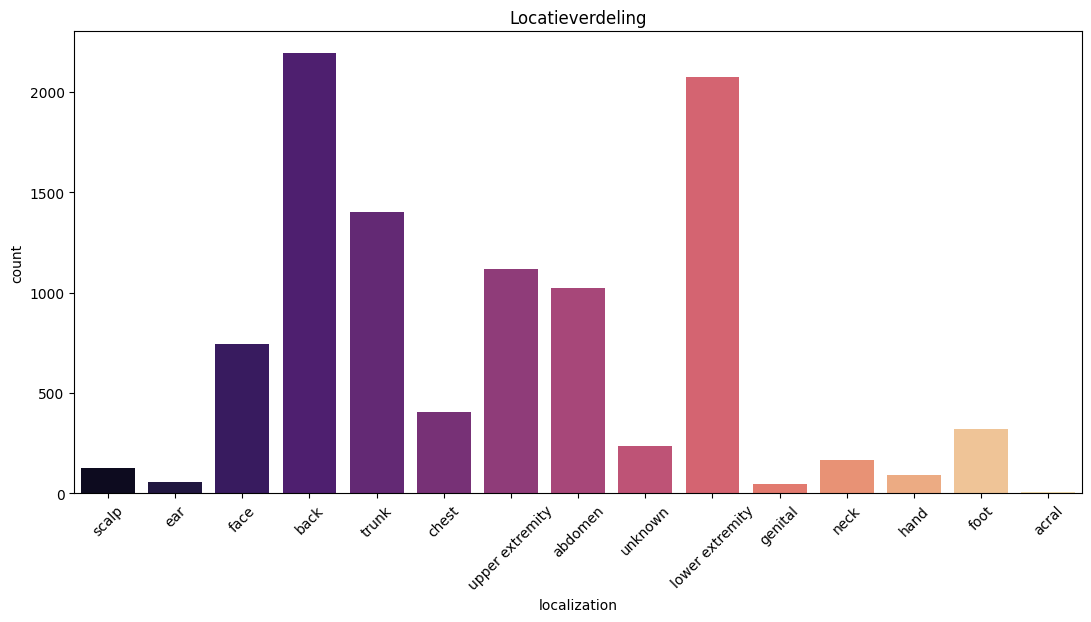

In [18]:
plt.figure(figsize=(13, 6))
sns.countplot(x='localization', data=df, palette="magma")
plt.title("Locatieverdeling")
plt.xticks(rotation=45)

Hieronder plot ik de dianose vorm van de afbeeldingen.

/tmp/ipykernel_2067669/1750047250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx_type', data=df, palette="coolwarm")


Text(0.5, 1.0, 'dianose vorm')

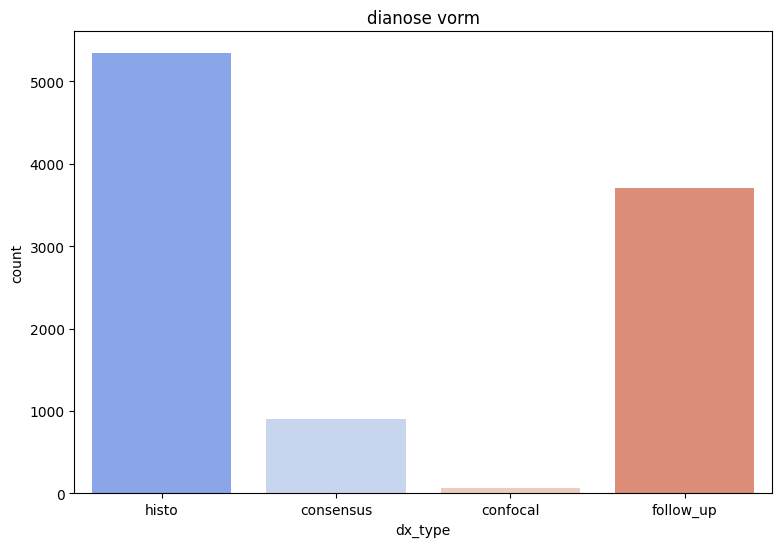

In [19]:
plt.figure(figsize=(9, 6)) 
sns.countplot(x='dx_type', data=df, palette="coolwarm")
plt.title("dianose vorm")

De meeste diagnoses zijn gebaseerd op histo en follow-up, aangezien deze als de meest betrouwbare worden beschouwd. Bovenaan lees je meer informatie hierover.

Hieronder bekijk ik welke index aan welke dx is toegewezen, zodat de gegevens overzichtelijker zijn voor toekomstige visualisaties.

In [20]:
dx_mapping = df[['dx', 'dx_index']].drop_duplicates().sort_values(by='dx_index')

print(dx_mapping)

         dx  dx_index
9687  akiec         0
2462    bcc         1
0       bkl         2
1095     df         3
1211    mel         4
64       nv         5
2320   vasc         6


- **akiec** heeft index 0
- **bcc** heeft index 1
- **bkl** heeft index 2
- **df** heeft index 3
- **mel** heeft index 4
- **nv** heeft index 5
- **vasc** heeft index 6

Hieronder maak ik een scatterplot van welke diagnose welke personen het meest hebben gekregen.

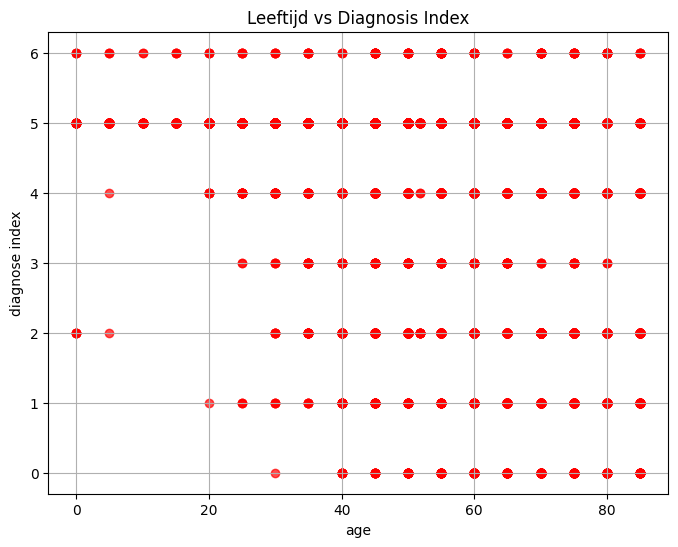

In [21]:
plt.figure(figsize=(8, 6))  
plt.scatter(df['age'], df['dx_index'], color='r', alpha=0.7)  
plt.title('Leeftijd vs Diagnosis Index')  
plt.xlabel('age')  
plt.ylabel('diagnose index') 
plt.grid(True)  
plt.show()  

Het lijkt erop dat huidkankertypes 0, 1,2, 3 en 4    niet veel voorkomen bij personen onder de 20 jaar.

Hieronder plot ik de verdeling van de dianose tussen mannen en vrouwen.

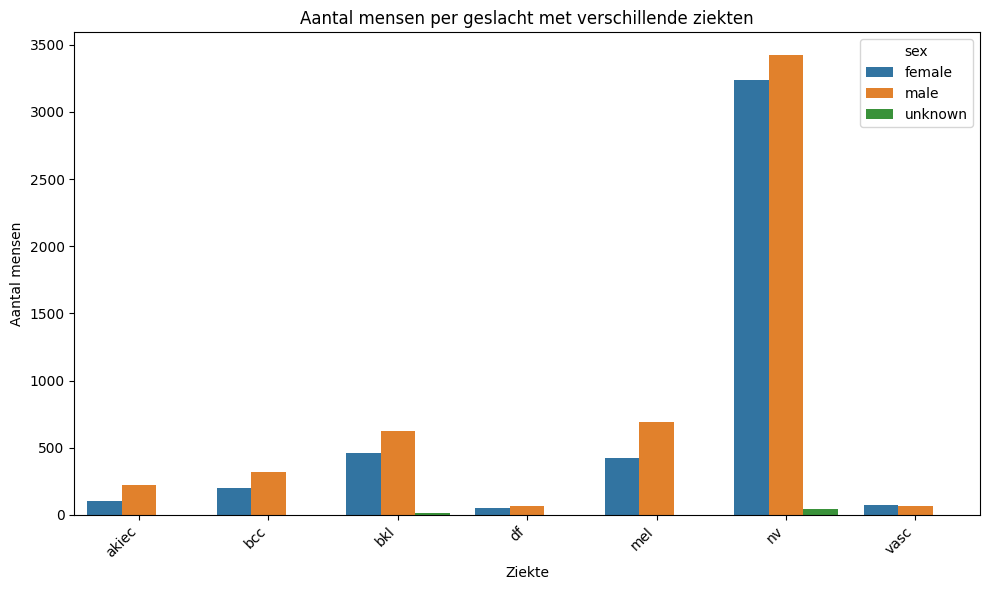

In [22]:

grouped_data = df.groupby(['sex', 'dx']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data, x='dx', y='count', hue='sex')

plt.title('Aantal mensen per geslacht met verschillende ziekten')
plt.xlabel('Ziekte')
plt.ylabel('Aantal mensen')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De verdeling is redelijk gelijk, wat suggereert dat het geslacht geen significante invloed heeft op het al dan niet hebben van huidkanker.

Hieronder open ik elke afbeelding in de dataset, schaal deze naar een formaat van 125x100 pixels, en slaat de omgezette afbeelding (als een numpy array) op in de nieuwe kolom image in de DataFrame df.

In [23]:

df['image'] = df['image_path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

De onderstaande code selecteert willekeurig een aantal monsterafbeeldingen voor elke cell_type en toont ze in een raster van subplots. Dit vind je misschien interessant om te zien en kun je kijken of je zelf duidelijke verschillen ziet.

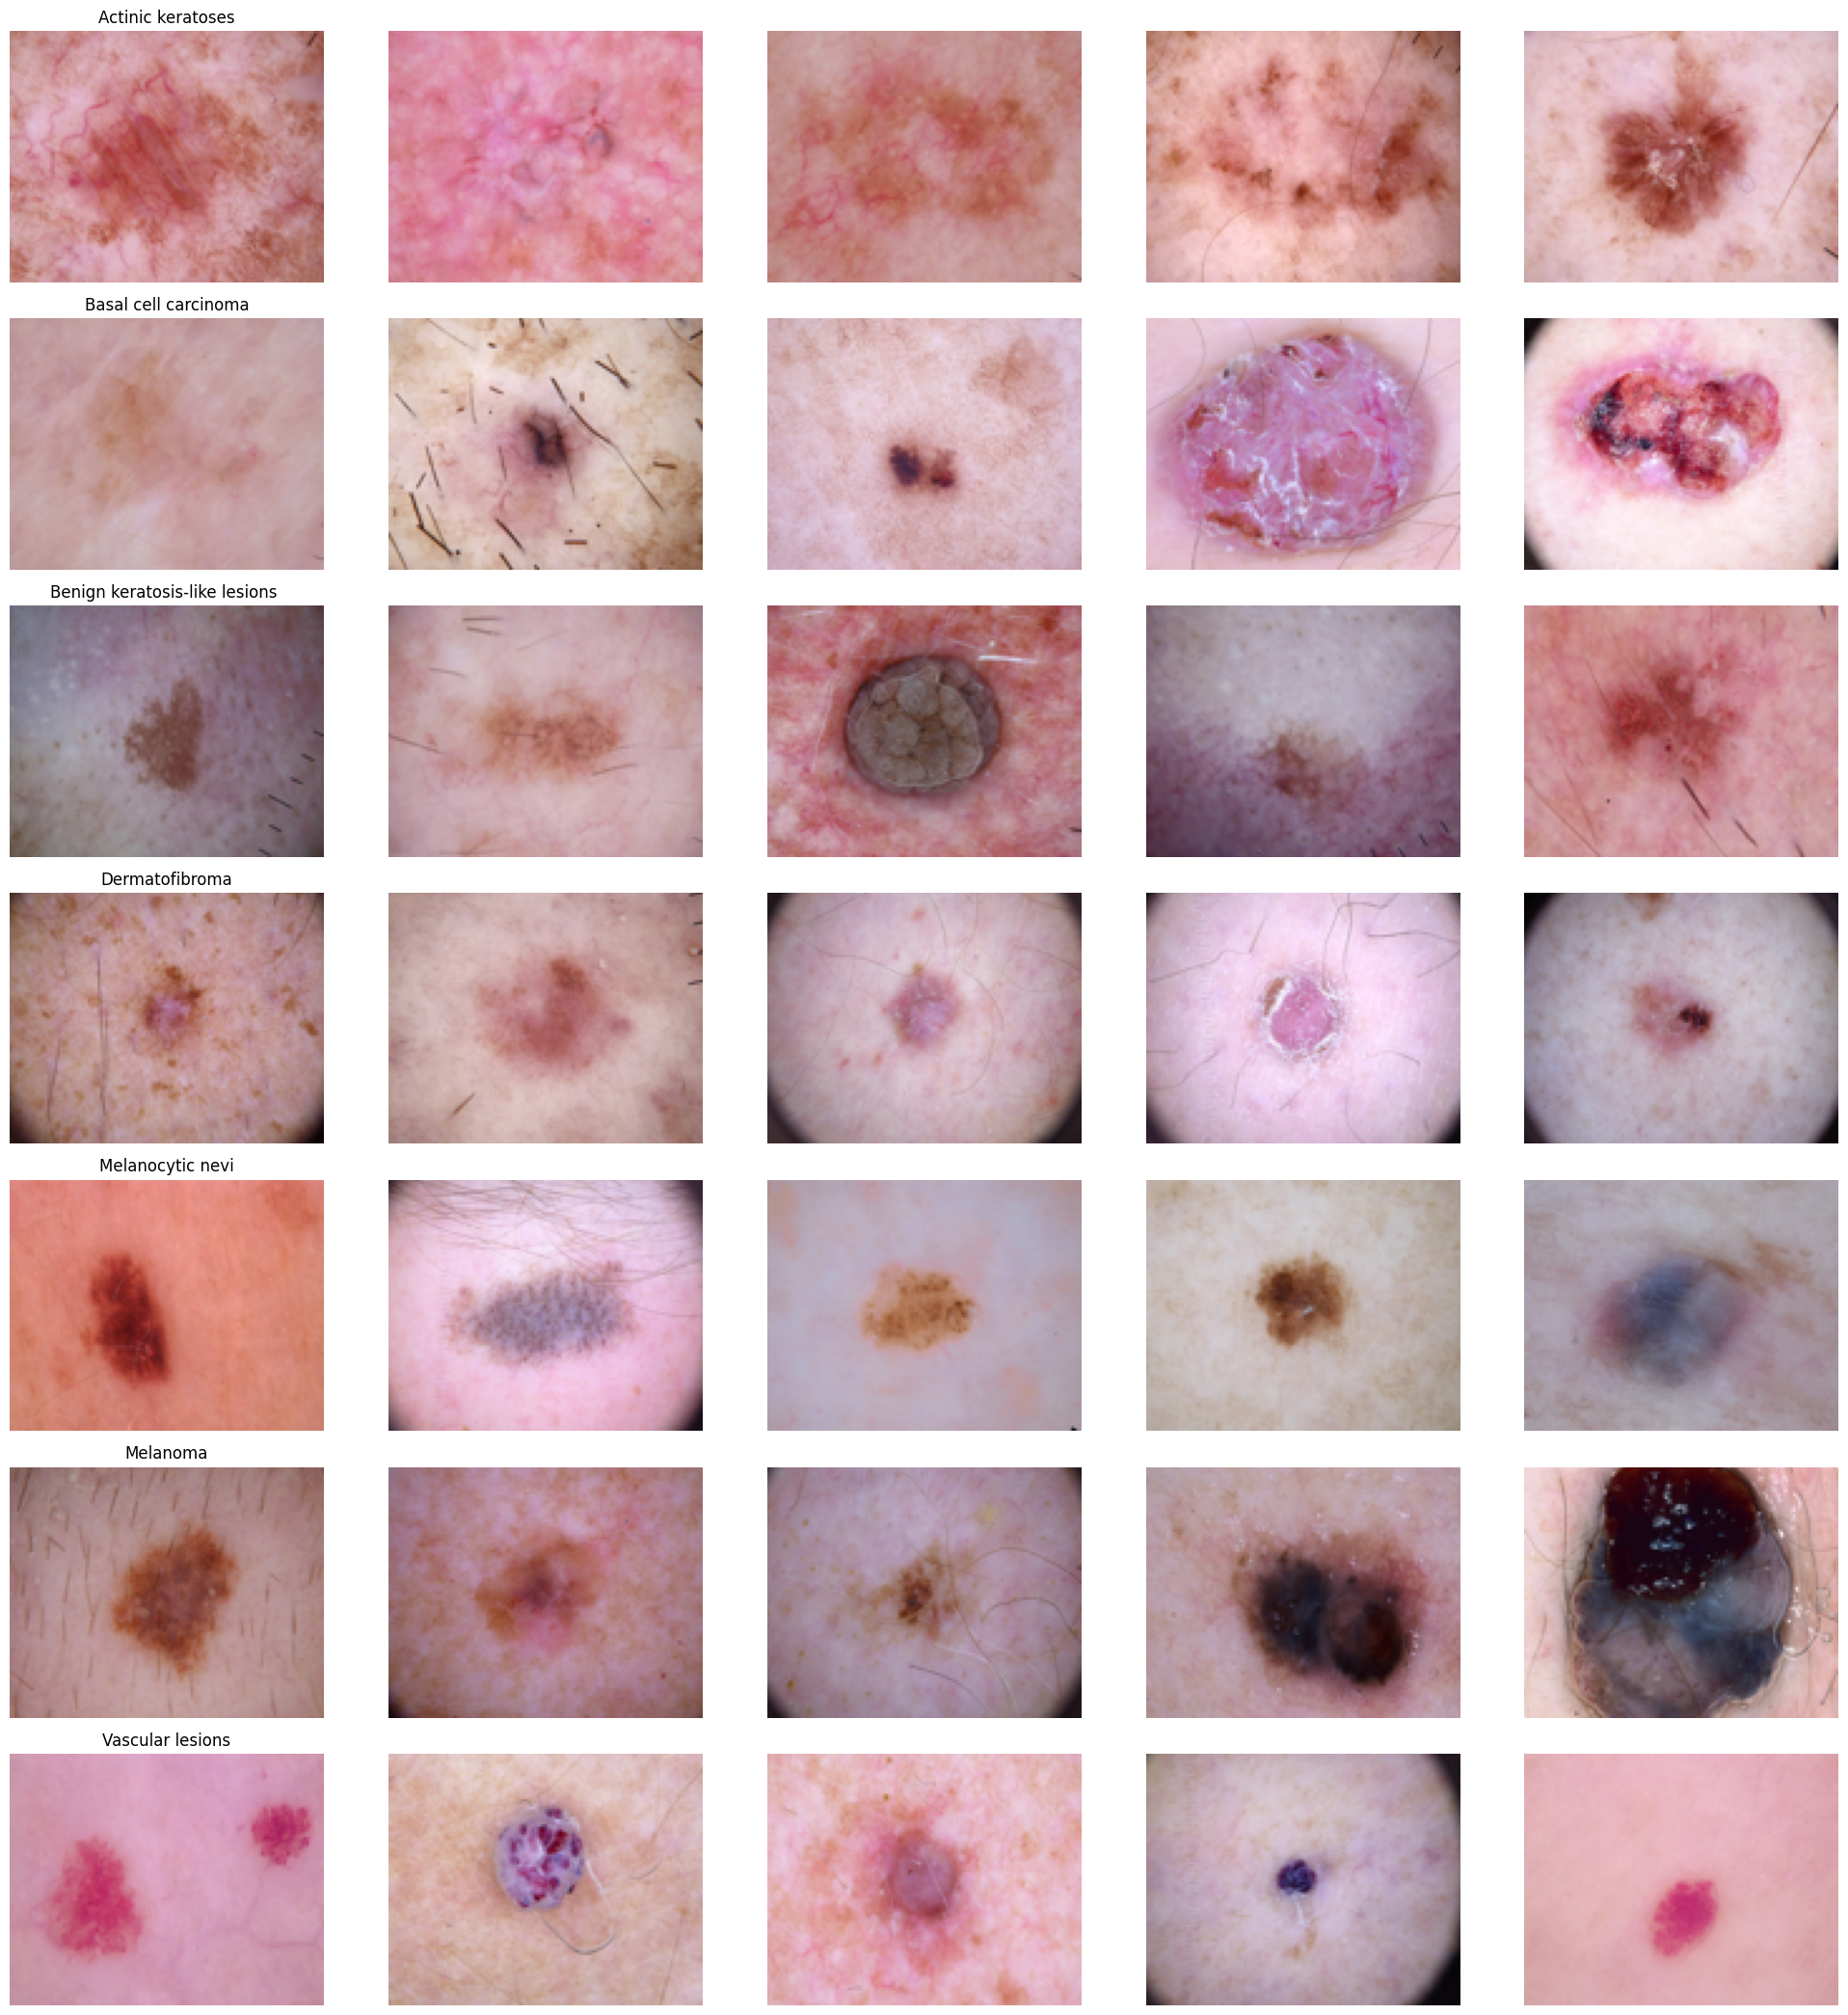

In [25]:
n_samples = 5

fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))

# Itereer door de cell_type groepen
for row_idx, (type_name, type_rows) in enumerate(df.sort_values(['cell_type']).groupby('cell_type')):
    m_axs[row_idx, 0].set_title(type_name)  
    sampled_rows = type_rows.sample(n_samples, random_state=1234)  
    for col_idx, (_, c_row) in enumerate(sampled_rows.iterrows()):
        m_axs[row_idx, col_idx].imshow(c_row['image'])  
        m_axs[row_idx, col_idx].axis('off')  


fig.tight_layout()
plt.show()

## Opzetten van een Basis CNN-model voor Huidkankerclassificatie.

Hieronder zie je de uiteindelijke DataFrame die ik ga gebruiken voor het trainen van mijn eerste model. Dit model is vrij eenvoudig en zal waarschijnlijk geen optimale prestaties leveren, omdat het niet geoptimaliseerd is voor nauwkeurigheid of complexiteit. Het is echter bedoeld als een basisexperiment om een fundamenteel begrip van CNN-modellen (Convolutional Neural Networks) te verkrijgen. Het tweede model zal veel geavanceerder zijn en naar verwachting veel betere resultaten opleveren, aangezien we dan gebruik zullen maken van geavanceerdere technieken. Dit eerste model dient als een opstap om de basisprincipes van deep learning en CNN's te begrijpen voordat we verder gaan met complexere benaderingen."

In [24]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  \
0  /students/2023-2024/Thema07/rumen_reactor/test...   
1  /students/2023-2024/Thema07/rumen_reactor/test...   
2  /students/2023-2024/Thema07/rumen_reactor/test...   
3  /students/2023-2024/Thema07/rumen_reactor/test...   
4  /students/2023-2024/Thema07/rumen_reactor/test...   

                        cell_type  dx_index  \
0  Benign keratosis-like lesions          2   
1  Benign keratosis-like lesions          2   
2  Benign keratosis-like lesions          2   
3  Benign keratosis-like lesions          2   
4  Benign keratosis-like lesions          2   

                                               image  
0  [[[189, 152, 194], [192, 156, 198], [191, 154,...  
1  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...  
2  [[[186, 127, 135], [189, 133, 145], [192, 135,...  
3  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...  
4  [[[131, 88, 110], [142, 97, 120], [152, 107, 1...

Hieronder splitst ik de DataFrame df op in features (de invoer voor het model) en target (de output die het model moet voorspellen). 

In [26]:
features=df.drop(columns=['dx_index'],axis=1)
target=df['dx_index']

In [27]:
features.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  \
0  /students/2023-2024/Thema07/rumen_reactor/test...   
1  /students/2023-2024/Thema07/rumen_reactor/test...   
2  /students/2023-2024/Thema07/rumen_reactor/test...   
3  /students/2023-2024/Thema07/rumen_reactor/test...   
4  /students/2023-2024/Thema07/rumen_reactor/test...   

                        cell_type  \
0  Benign keratosis-like lesions    
1  Benign keratosis-like lesions    
2  Benign keratosis-like lesions    
3  Benign keratosis-like lesions    
4  Benign keratosis-like lesions    

                                               image  
0  [[[189, 152, 194], [192, 156, 198], [191, 154,...  
1  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...  
2  [[[186, 127, 135], [189, 133, 145], [192, 135,...  
3  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...  
4  [[[131, 88, 110], [142, 97, 120], [152, 107, 1...

Features heeft geen dx_index meer, dus ik kan de data hieronder splitsen in train- en testdata. Ik kies voor een test size van 0.15 (15%), omdat dit een goede balans biedt tussen voldoende data voor zowel training als evaluatie. Een testgrootte van 15% is vaak groot genoeg om de prestaties van het model betrouwbaar te testen, terwijl de rest van de data (85%) voldoende is voor het trainen van het model.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)
tf.unique(X_train.cell_type.values)

2025-01-21 09:23:54.290226: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Benign keratosis-like lesions ', b'Melanocytic nevi',
       b'Melanoma', b'Dermatofibroma', b'Basal cell carcinoma',
       b'Actinic keratoses', b'Vascular lesions'], dtype=object)>, idx=<tf.Tensor: shape=(8512,), dtype=int32, numpy=array([0, 1, 1, ..., 1, 0, 1], dtype=int32)>)

hieronder converteer ik de afbeeldingsdata naar numpy arrays en normaliseert zowel de train als test data op basis van hun respectieve gemiddelde en standaarddeviatie. Dit is een gebruikelijke stap om de prestaties van het model te verbeteren, doordat het zorgt voor consistente schaling van de gegevens

In [29]:
x_train = np.asarray(X_train['image'].tolist())
x_test = np.asarray(X_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

X_train = (x_train - x_train_mean)/x_train_std
X_test = (x_test - x_test_mean)/x_test_std

Hieronder zet ik de doelvariabele y_train en y_test om naar one-hot encoding, wat een vereiste is voor het trainen van een multiclass classificatiemodel. Dit maakt het gemakkelijker voor het model om de verschillende klassen te leren en te voorspellen.

In [30]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)


Ik splits de code naar trainingsdata op in een training- en validatieset en zorgt ervoor dat alle afbeeldingsdata de juiste vorm heeft om te worden ingevoerd in het CNN-model (100x125 pixels, 3 kleurkanalen). Het gebruik van een validatieset maakt het mogelijk om de prestaties van het model te volgen tijdens het trainen en voorkomt overfitting

In [31]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 48)

x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [32]:
x_train = x_train.reshape(x_train.shape[0], 100 * 125 * 3)
x_test = x_test.reshape(x_test.shape[0], 100 * 125 * 3)

print(x_train.shape)
print(x_test.shape)

(7660, 37500)
(1503, 37500)


Hierboven kijk ik of de shape klopt en de shape is goed.

Hieronder word de afbeeldingen in de trainings-, test- en validatiesets worden afgevlakt van een 3D-vorm (hoogte, breedte, kleurkanalen) naar een 1D-vector van grootte 37500. Dit maakt de data geschikt voor gebruik in het basis model die ik van plan ben te gebruiken.

In [33]:
x_train = x_train.reshape(x_train.shape[0], -1)  
x_test = x_test.reshape(x_test.shape[0], -1)  
x_validate = x_validate.reshape(x_validate.shape[0], -1) 


print(x_train.shape)
print(x_test.shape)
print(x_validate.shape)


(7660, 37500)
(1503, 37500)
(852, 37500)


### Uitleg van het Model

In deze sectie wordt een neuraal netwerkmodel gedefinieerd en getraind met behulp van Keras en TensorFlow. Dit model wordt gebruikt voor het classificeren van huidkankerafbeeldingen. Hieronder volgt een uitleg van de verschillende stappen en componenten die betrokken zijn bij het opzetten en trainen van het model.

#### 1. **Definiëren van het Model**
Het model wordt gedefinieerd als een **Sequential** model, wat betekent dat de lagen van het netwerk opeenvolgend worden toegevoegd. Dit is een veelgebruikte structuur voor neurale netwerken.

#### 2. **Verborgen Lagen**
Het model bevat vier verborgen lagen. Elke laag is een **Dense** laag, wat betekent dat elke neuron in de laag volledig verbonden is met de neuronen in de volgende laag. Voor de activatiefunctie wordt **ReLU (Rectified Linear Unit)** gebruikt, wat helpt bij het leren van niet-lineaire patronen in de data. Elke verborgen laag bevat ook **Batch Normalization**, wat de training stabiliseert door de activaties van de neuronen te normaliseren. **Dropout** wordt toegevoegd om overfitting te voorkomen, waarbij willekeurig een deel van de neuronen wordt uitgeschakeld tijdens de training.

#### 3. **Output Laag**
De outputlaag van het model bestaat uit 7 neuronen, wat overeenkomt met het aantal verschillende huidkankerdiagnoses in de dataset. De activatiefunctie die hier wordt gebruikt is **softmax**, wat typisch is voor multiclass classificatie. Het model berekent de waarschijnlijkheid voor elke klasse en kiest de klasse met de hoogste waarschijnlijkheid als output.

#### 4. **Optimizer en Lossfunctie**
De optimizer die voor dit model wordt gebruikt is **Adam**, een populaire optimizer die de leersnelheid dynamisch aanpast tijdens het trainingsproces. De **categorical crossentropy** wordt gekozen als verliesfunctie, omdat dit geschikt is voor multiclass classificatieproblemen, waarbij het model probeert de juiste klasse te voorspellen voor elk voorbeeld in de dataset.

#### 5. **Compileren van het Model**
Het model wordt gecompileerd met de **Adam** optimizer, de **categorical crossentropy** verliesfunctie en de **nauwkeurigheid** als evaluatie-metric. Dit zorgt ervoor dat het model de prestaties kan meten tijdens de training en evaluatie.

#### 6. **Trainingsproces**
Het model wordt getraind op de **trainingsdata** met behulp van de **fit** methode. Hierbij worden de trainingsdata in batches aan het model gepresenteerd. Het aantal **epochs** geeft aan hoe vaak het model de volledige dataset zal doorlopen tijdens de training. De **validatiegegevens** worden gebruikt om de prestaties van het model gedurende de training te monitoren en overfitting te voorkomen.

#### 7. **Evaluatie van het Model**
Na de training wordt het model geëvalueerd met behulp van de **testdata**. Dit geeft een indicatie van hoe goed het model presteert op nieuwe, ongeziene gegevens. De nauwkeurigheid van het model op de testset wordt berekend en weergegeven als percentage.




In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf


model = Sequential()

# First hidden layer
model.add(Dense(units=128, kernel_initializer='he_normal', activation='relu', input_dim=37500))
model.add(BatchNormalization())  
model.add(Dropout(0.5))  

# Second hidden layer
model.add(Dense(units=128, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(units=128, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth hidden layer
model.add(Dense(units=64, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=7, kernel_initializer='he_normal', activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=10, epochs=15, validation_data=(x_validate, y_validate), verbose=1)

accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test accuracy = ", accuracy * 100, "%")



/homes/jrgommers/year 3/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


2025-01-21 09:24:38.611909: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 287250000 exceeds 10% of free system memory.


766/766 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.2857 - loss: 2.3057 - val_accuracy: 0.6655 - val_loss: 1157.4679
Epoch 2/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6222 - loss: 1.2376 - val_accuracy: 0.6643 - val_loss: 1.0130
Epoch 3/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6452 - loss: 1.1069 - val_accuracy: 0.6608 - val_loss: 1.0264
Epoch 4/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.6574 - loss: 1.0563 - val_accuracy: 0.6432 - val_loss: 1.1731
Epoch 5/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.6633 - loss: 1.0462 - val_accuracy: 0.6643 - val_loss: 1.0448
Epoch 6/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.6656 - loss: 1.0143 - val_accuracy: 0.6655 - val_loss: 1.2671
Epoch 7/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6717 - loss: 1.0169 - val_accuracy: 0.6631 - val_loss: 1.0793
Epoch 8/15
766/766 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.6624 - loss: 1.0238 - val_accu

### Uitleg over Modelprestaties

Het model heeft een trainingsfase doorlopen waarin de nauwkeurigheid en verlieswaarden voor zowel de training- als validatieset werden gemeten. De getoonde waarden geven de prestaties van het model weer op beide datasets.

- De **training accuracy** geeft aan hoe goed het model presteert op de trainingsgegevens. In dit geval was de nauwkeurigheid redelijk laag.
- Het **trainingsverlies** geeft aan hoeveel het model 'fout' zit tijdens de training. Een hoger verlies betekent dat het model verder van de ideale oplossing af is.
- De **validatie-nauwkeurigheid** en **validatie-verlies** tonen de prestaties van het model op de validatiegegevens. Een hogere validatie-nauwkeurigheid en een lager verlies wijzen op een beter generaliserend model.

In de tweede fase werd het model getest op de testset, waarbij de prestaties opnieuw werden gemeten. De nauwkeurigheid en verlies laten zien hoe goed het model presteerde op deze nieuwe, ongeziene data.

Je ziet hier ook dat de data waarschijnlijk flink overfit aangezien de accuracy zowat als gelijk staat aan hoeveel procent NV in de data voorkomt.
Andere modellen zouden hier beter bestand tegen moeten zijn.



In [ ]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  


y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Voorspelde label')
plt.ylabel('Werkelijke label')
plt.title('Confusion Matrix')
plt.show()

In [349]:
from tensorflow.keras.utils import plot_model

# Generate the plot of the model architecture and save it as an image file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


Hierboven met de `plot_model` functie van Keras kun je de architectuur van het getrainde model visualiseren. Dit geeft je een duidelijk overzicht van de verschillende lagen van het netwerk, hun verbindingen en de vorm van de data die door elke laag stroomt.


- Het diagram toont een hiërarchische weergave van de lagen in het model.
- Je kunt zien hoeveel lagen er zijn, welk type elke laag heeft (bijvoorbeeld Dense, Dropout, BatchNormalization), en hoeveel neuronen (of units) elke laag bevat.
- De vormen van de data die door het netwerk bewegen, worden visueel weergegeven, wat helpt om te begrijpen hoe de gegevens door het model gaan.


# Het Ontwerpen en Optimaliseren van het Beste CNN Model voor Huidkankerclassificatie EfficientNetB0

### Waarom EfficientNetB0?

Voor deze huidkankerclassificatie heb ik gekozen voor het **EfficientNetB0** model. Dit model behoort tot de EfficientNet-familie, die bekend staat om zijn balans tussen nauwkeurigheid en efficiëntie. EfficientNetB0 biedt een solide basis voor beeldclassificatie, zelfs bij datasets met hoge resolutie afbeeldingen, zoals deze huidkanker-dataset.

#### Redenen voor de keuze van EfficientNetB0:

1. **Balans tussen prestaties en rekenkracht**:  
   EfficientNetB0 levert uitstekende prestaties met minder rekenkracht in vergelijking met complexere modellen. Dit maakt het bijzonder geschikt voor toepassingen waarbij hardwarelimitaties een rol spelen.

2. **Goed omgaan met ongelijke datasets**:  
   Door de efficiënte architectuur en ingebouwde regularisatiemethoden is EfficientNetB0 robuust tegen ongebalanceerde datasets. Het model weet de belangrijkste patronen te herkennen, zelfs wanneer de klassenverdeling ongelijk is, zoals vaak het geval is bij medische datasets.

3. **Overfitting voorkomen**:  
   EfficientNetB0 maakt gebruik van technieken zoals Dropout en Batch Normalization, die overfitting helpen verminderen. Dit is essentieel bij kleinere datasets of datasets met een scheve klassenverdeling.

#### Waarom EfficientNetB0 kiezen boven andere modellen?

Als voorbeeld: je zou kunnen kiezen tussen **EfficientNetB0** en een ouder model zoals **VGG16**. Hoewel VGG16 eenvoudig te begrijpen en implementeren is, heeft het een veel hogere rekenbehoefte door de grotere netwerkarchitectuur, terwijl het vaak niet dezelfde nauwkeurigheid behaalt als EfficientNetB0. Aan de andere kant zijn grotere modellen zoals **EfficientNetB7** krachtiger, maar ze vereisen aanzienlijk meer geheugen en tijd om te trainen, wat niet praktisch is bij beperkte middelen.

#### Uitvoering buiten Jupyter Notebook  
Het gebruik van EfficientNetB0 bleek al een uitdaging voor de beschikbare servers. Dit maakte het onmogelijk om het model rechtstreeks in Jupyter Notebook te trainen. Daarom is de trainingscode verplaatst naar een apart Python-script. De trainingsresultaten zijn vervolgens overgezet naar deze notebook voor verdere analyse.

#### Belangrijk advies:  
Hoewel de code exact hetzelfde blijft, wordt het sterk afgeraden dit model op een laptop te trainen vanwege de hoge rekenintensiteit. Voor optimale prestaties en trainingstijd wordt aanbevolen om gebruik te maken van krachtige GPU-servers.


### Data Herladen en Voorbereiden

In dit gedeelte laad ik de data opnieuw in en zorg ik ervoor dat de afbeeldingspaden correct worden gekoppeld aan de juiste rijen in de dataframe. Vervolgens worden de ontbrekende of niet-gespecificeerde leeftijden (age) opnieuw ingevuld met de gemiddelde leeftijd van de dataset, net zoals eerder is gedaan. Dit zorgt ervoor dat de dataset volledig en consistent is voor verdere verwerking.


In [ ]:
# Metadata inladen
metadata = pd.read_csv("/students/2023-2024/Thema07/rumen_reactor/test/HAM10000_metadata.csv")
image_dir_part1 = "/students/2023-2024/Thema07/rumen_reactor/test/images/part_1"
image_dir_part2 = "/students/2023-2024/Thema07/rumen_reactor/test/images/part_2"

metadata['image_path'] = metadata['image_id'].apply(
    lambda x: os.path.join(
        image_dir_part1 if os.path.exists(os.path.join(image_dir_part1, f"{x}.jpg")) else image_dir_part2,
        f"{x}.jpg"
    )
)
metadata = metadata[metadata['image_path'].apply(os.path.exists)]


In [ ]:
metadata.head()

In [ ]:
metadata['age'].fillna((metadata['age'].mean()), inplace=True)


### Data Splitsen en Voorbereiden met Data Augmentatie

Hieronder splits ik de dataset in train-, validatie- en testsets, waarbij ik ervoor zorg dat de klassenverhoudingen in elke subset behouden blijven door **stratified sampling** toe te passen op de diagnosekolom (`dx`). Dit is belangrijk om ervoor te zorgen dat alle huidkankertypen evenredig worden vertegenwoordigd in elke subset.

#### Data Augmentatie voor Trainingsset
Om overfitting te voorkomen en de robuustheid van het model te vergroten, pas ik data-augmentatie toe op de trainingsset. Dit omvat transformaties zoals:
- **Rotatie** (rotation_range): Verandert de oriëntatie van de afbeeldingen.
- **Verplaatsing** (width_shift_range en height_shift_range): Simuleert variaties in framing.
- **Shear**: Voegt schuinheid toe aan afbeeldingen.
- **Zoom**: Vergroot of verkleint de afbeeldingen.
- **Horizontale spiegeling** (horizontal_flip): Vergroot de variatie in oriëntatie.
- **Helderheidsvariatie** (brightness_range): Simuleert verschillen in lichtomstandigheden.
Deze augmentaties worden toegepast tijdens het laden van de trainingsafbeeldingen, zodat er meer variatie ontstaat zonder extra gegevens toe te voegen.

#### Validatie- en Testsets
Voor de validatie- en testsets worden de afbeeldingen alleen geschaald naar een bereik tussen 0 en 1 (`rescale=1./255`) om de trainings- en testomstandigheden consistent te houden. Dit is cruciaal om ervoor te zorgen dat het model presteert op de echte testdata zoals verwacht.

#### Data Generators
Ik maak gebruik van `ImageDataGenerator` om batches van afbeeldingen te laden en te verwerken. Dit maakt het mogelijk om efficiënt met grote datasets te werken:
- **Trainingsgenerator**: Laadt en augmenteert de trainingsgegevens.
- **Validatiegenerator**: Laadt de validatiegegevens zonder augmentatie.
- **Testgenerator**: Laadt de testgegevens zonder augmentatie en schakelt `shuffle=False` in, zodat de volgorde van de resultaten consistent blijft voor evaluatie.


In [ ]:
train, test = train_test_split(metadata, test_size=0.15, stratify=metadata['dx'], random_state=42)
train, val = train_test_split(train, test_size=0.15, stratify=train['dx'], random_state=42)


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
).flow_from_dataframe(
    train, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32
)


In [ ]:
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    val, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32
)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32, shuffle=False
)

### Model Initialisatie met BatchNormalization en L2 Regularisatie

#### Het Gebruik van EfficientNetB0
Het model is gebaseerd op **EfficientNetB0**, een geavanceerd en efficiënt convolutioneel neuraal netwerk. De instellingen zijn als volgt:
- **Gewichten**: Het model maakt gebruik van vooraf getrainde gewichten van ImageNet, wat de trainingstijd verkort en zorgt voor betere prestaties door gebruik te maken van algemene kenmerken.
- **Invoer**: De invoerafmetingen zijn ingesteld op (224, 224, 3), wat gebruikelijk is voor modellen die op ImageNet zijn getraind.

#### Toevoeging van Lagere Architectuurlagen
1. **Global Average Pooling**: De uitvoer van het basismodel wordt gereduceerd tot een gemiddeld samenvattingsniveau over alle ruimtelijke dimensies, wat overfitting minimaliseert.
2. **BatchNormalization**: Deze laag standaardiseert de activaties, waardoor het model sneller convergeert en beter generaliseert.
3. **Dropout**: Een dropout van 0.5 wordt toegepast om overfitting verder te voorkomen door willekeurig verbindingen tijdens de training te deactiveren.

#### Outputlaag met L2 Regularisatie
- **Outputlaag**: De laatste laag heeft 7 neuronen (één voor elke klasse), met een softmax-activatiefunctie voor probabilistische output.
- **Kernel Regularization (L2)**: L2-regularisatie (met een waarde van 0.01) wordt gebruikt om de gewichten te beperken en overfitting te voorkomen door te straffen voor te grote gewichten.

#### Voordelen van deze Aanpak
- **Efficiëntie**: Door gebruik te maken van EfficientNetB0 wordt de balans tussen prestaties en modelgrootte optimaal benut.
- **Generalisatie**: BatchNormalization en Dropout zorgen voor een betere generalisatie naar onbekende data.
- **Stabiliteit**: L2-regularisatie voorkomt dat het model te veel vertrouwen krijgt in specifieke patronen, wat cruciaal is voor datasets met ongelijke verdelingen.

Deze architectuur is een krachtige keuze voor het classificeren van huidkankerbeelden, met een sterke focus op robuustheid en efficiëntie.


In [ ]:
# Model initialiseren met BatchNormalization en L2 regularisatie
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax', kernel_regularizer=l2(0.01))(x)
model = Model(inputs=base_model.input, outputs=output)


### Mixed Precision Training en Modeloptimalisatie

#### Mixed Precision Training
Hier pas ik **mixed precision training** toe door een beleid in te stellen waarbij het model gebruikmaakt van zowel 16-bits als 32-bits floating-pointwaarden. Mixed precision training biedt de volgende voordelen:
- **Snellere training**: Door minder precisie te gebruiken (16-bit) waar mogelijk, kan de training sneller worden uitgevoerd op moderne GPU's met Tensor Cores.
- **Lagere geheugenvereisten**: Het verlaagt het geheugengebruik, waardoor grotere modellen of grotere batchgroottes mogelijk zijn.

#### Model Compileren
Het model wordt gecompileerd met de volgende instellingen:
- **Optimizers**: Ik gebruik `AdamW`, een geavanceerde optimizer met ingebouwde gewichtsafname (weight decay) om overfitting te minimaliseren.
- **Learning rate**: Een relatief lage leersnelheid (1e-4) wordt gekozen voor een stabiele convergentie.
- **Lossfunctie**: Categorical crossentropy wordt gebruikt, passend voor multiclass-classificatie.
- **Metric**: De nauwkeurigheid wordt geëvalueerd om de prestaties van het model te meten.

#### Callbacks voor Optimalisatie
Ik stel twee callbacks in om de training te optimaliseren:
1. **Early Stopping**: Stopt de training vroegtijdig als de validatieprestaties niet verbeteren na een aantal opeenvolgende epochs (patience=5). Dit voorkomt onnodige overtraining.
2. **Learning Rate Scheduler (ReduceLROnPlateau)**: Verlaagt de leersnelheid met een factor van 0.2 als de prestaties na 5 epochs niet verbeteren. Dit helpt het model om fijner in te zoomen op een minimum in de loss-functie zonder over te schieten.




In [ ]:
# Mixed Precision Training
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


In [ ]:
# Compileer model
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

### Model Trainen

#### Trainingsproces
Het model wordt getraind met de volgende instellingen:
- **Trainingsgenerator**: De data wordt geleverd door `train_gen`, waarbij real-time augmentatie plaatsvindt. Dit zorgt voor meer variatie in de trainingsdata en verbetert de generalisatie.
- **Validatiegenerator**: Tijdens het trainen wordt het model geëvalueerd op de validatieset (`val_gen`) om de prestaties te monitoren en overfitting te voorkomen.
- **Aantal Epochs**: Het model wordt getraind voor maximaal 50 epochs. Door het gebruik van callbacks wordt de training vroegtijdig gestopt wanneer er geen verbetering meer optreedt.
- **Callbacks**:
  - **EarlyStopping**: Stopt de training als de validatieprestaties niet verbeteren binnen een vooraf gedefinieerd aantal epochs.
  - **ReduceLROnPlateau**: Verlaagt de leersnelheid adaptief wanneer de prestaties stagneren, wat kan helpen om een betere oplossing te vinden.


In [ ]:
# Model trainen
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50, 
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[early_stopping, reduce_lr],  
    verbose=1
)

### Trainingsresultaten per Epoch

Hieronder worden de resultaten van de training per epoch weergegeven, inclusief accuracy, loss, validatie-accuracy, validatie-loss en leersnelheid.

| Epoch | Train Accuracy | Train Loss | Val Accuracy | Val Loss | Learning Rate |
|-------|----------------|------------|--------------|----------|---------------|
| 1     | 31.24%         | 2.6316     | 11.20%       | 1.9883   | 1.0000e-04    |
| 2     | 60.50%         | 1.6075     | 5.09%        | 2.7628   | 1.0000e-04    |
| 3     | 69.85%         | 1.2499     | 50.43%       | 1.7221   | 1.0000e-04    |
| 4     | 71.78%         | 1.0753     | 64.37%       | 1.4299   | 1.0000e-04    |
| 5     | 73.67%         | 1.0133     | 19.50%       | 56.6331  | 1.0000e-04    |
| 6     | 75.22%         | 0.9059     | 18.32%       | 195.1032 | 1.0000e-04    |
| 7     | 76.84%         | 0.8255     | 68.52%       | 1.3952   | 1.0000e-04    |
| 8     | 79.11%         | 0.7515     | 67.58%       | 1.4726   | 1.0000e-04    |
| 9     | 79.81%         | 0.7032     | 66.64%       | 1.5246   | 1.0000e-04    |
| 10    | 81.27%         | 0.6529     | 67.11%       | 1.4105   | 1.0000e-04    |
| 11    | 81.08%         | 0.6715     | 65.39%       | 1.5360   | 1.0000e-04    |
| 12    | 82.59%         | 0.6128     | 66.95%       | 1.9629   | 1.0000e-04    |
| 13    | 83.88%         | 0.5740     | 70.79%       | 1.1928   | 2.0000e-05    |
| 14    | 84.40%         | 0.5410     | 69.54%       | 1.1937   | 2.0000e-05    |
| 15    | 84.84%         | 0.5353     | 67.27%       | 1.4847   | 2.0000e-05    |
| 16    | 84.76%         | 0.5381     | 72.91%       | 1.0538   | 2.0000e-05    |
| 17    | 85.23%         | 0.5147     | 80.42%       | 0.7612   | 2.0000e-05    |
| 18    | 85.18%         | 0.4959     | 70.24%       | 1.4183   | 2.0000e-05    |
| 19    | 85.66%         | 0.5073     | 78.54%       | 0.8529   | 2.0000e-05    |
| 20    | 85.52%         | 0.4944     | 68.05%       | 1.8065   | 2.0000e-05    |
| 21    | 86.38%         | 0.4848     | 75.49%       | 0.9537   | 2.0000e-05    |
| 22    | 86.83%         | 0.4655     | 72.83%       | 1.0376   | 2.0000e-05    |
| 23    | 86.75%         | 0.4669     | 84.81%       | 0.6025   | 4.0000e-06    |
| 24    | 86.53%         | 0.4720     | 83.24%       | 0.6342   | 4.0000e-06    |
| 25    | 86.75%         | 0.4489     | 83.16%       | 0.6186   | 4.0000e-06    |
| 26    | 86.87%         | 0.4571     | 83.95%       | 0.6349   | 4.0000e-06    |
| 27    | 86.33%         | 0.4587     | 84.89%       | 0.5820   | 4.0000e-06    |
| 28    | 87.67%         | 0.4515     | 83.63%       | 0.6131   | 4.0000e-06    |
| 29    | 87.72%         | 0.4443     | 82.62%       | 0.6237   | 4.0000e-06    |
| 30    | 86.46%         | 0.4594     | 84.73%       | 0.5713   | 4.0000e-06    |
| 31    | 87.56%         | 0.4419     | 83.48%       | 0.5976   | 4.0000e-06    |
| 32    | 87.42%         | 0.4502     | 82.77%       | 0.6426   | 4.0000e-06    |
| 33    | 87.26%         | 0.4397     | 81.68%       | 0.6910   | 4.0000e-06    |
| 34    | 87.35%         | 0.4598     | 82.77%       | 0.6322   | 4.0000e-06    |
| 35    | 87.75%         | 0.4418     | 85.36%       | 0.5748   | 4.0000e-06    |
| 36    | 87.25%         | 0.4339     | 85.12%       | 0.5765   | 1.0000e-06    |
| 37    | 87.74%         | 0.4320     | 84.65%       | 0.5813   | 1.0000e-06    |
| 38    | 86.48%         | 0.4474     | 84.10%       | 0.5996   | 1.0000e-06    |
| 39    | 87.77%         | 0.4319     | 85.43%       | 0.5669   | 1.0000e-06    |
| 40    | 88.00%         | 0.4298     | 85.59%       | 0.5621   | 1.0000e-06    |
| 41    | 86.88%         | 0.4467     | 85.67%       | 0.5644   | 1.0000e-06    |
| 42    | 87.52%         | 0.4353     | 84.49%       | 0.5927   | 1.0000e-06    |
| 43    | 87.83%         | 0.4323     | 84.89%       | 0.5856   | 1.0000e-06    |
| 44    | 88.04%         | 0.4419     | 85.20%       | 0.5696   | 1.0000e-06    |
| 45    | 88.49%         | 0.4151     | 85.59%       | 0.5600   | 1.0000e-06    |


### Korte Uitleg over de Resultaten

1. **Algemene Trends**:
   - De **trainingsnauwkeurigheid** neemt consistent toe naarmate de epochs vorderen, wat duidt op een verbeterende prestatie van het model op de trainingsset.
   - De **trainingsverlieswaarde** daalt , wat aangeeft dat het model steeds beter leert om de fouten in de voorspellingen te minimaliseren.

2. **Validatieprestaties**:
   - De **validatienauwkeurigheid** fluctueert, maar vertoont vanaf epoch 16 een stabiele verbetering, met enkele uitschieters zoals bij epoch 5 en 6, mogelijk door onstabiele gradiënten of overfitting in die stadia.
   - De **validatieverlieswaarden** tonen een duidelijke verbetering na de eerste epochs, maar schommelen daarna soms afhankelijk van de leerfase.

3. **Leerproces**:
   - De **leersnelheid** werd in stappen verlaagd (bijvoorbeeld vanaf epoch 13), wat helpt om fijner te leren naarmate het model dichter bij optimale prestaties komt.
   - Dit resulteerde in een betere stabiliteit van de validatieresultaten vanaf de latere epochs.

4. **Uitzonderingen**:
   - Hoge verlieswaarden in epoch 5 en 6 kunnen wijzen op een tijdelijk probleem, zoals verkeerde balans in de optimalisatie of een fout in de gegevens. Dit werd later gecorrigeerd.

5. **Eindresultaten**:
   - De **beste validatienauwkeurigheid** (~85%) werd bereikt in de laatste epochs, samen met een aanzienlijk verlaagd validatieverlies, wat wijst op een goede prestatie van het model.




### Test accuracy

Hieronder kijk ik naar de accuracy van de testdata set dit is een belangrijk onderdeel omdat dit aangeeft hoe goed jouw model presteert op nieuwe data.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

### Test Resultaten

- **Test Accuracy**: 84.00%
  - Dit geeft aan dat het model 84% van de testvoorbeelden correct heeft geclassificeerd.

- **Evaluatietijd**:
  - **47/47** stappen werden uitgevoerd met een totale tijd van **19 seconden en 363 milliseconden per stap**.

De test accuracy van 84.00% betekent dat het model 84% van de testdata correct heeft geclassificeerd, wat een goed resultaat is, vooral gezien de complexiteit van de taak met 7 verschillende types.

Het evaluatietijdstip van 19 seconden per stap toont aan dat het model redelijk snel werkt tijdens de evaluatiefase.

In [ ]:
# Classificatierapport en Confusion Matrix
predictions = np.argmax(model.predict(test_gen), axis=-1)
true_labels = test_gen.classes

print(classification_report(true_labels, predictions, target_names=list(test_gen.class_indices.keys())))


### Classification Report

| Class  | Precision | Recall | F1-Score | Support |
|--------|-----------|--------|----------|---------|
| akiec  | 0.82      | 0.29   | 0.42     | 49      |
| bcc    | 0.84      | 0.55   | 0.66     | 77      |
| bkl    | 0.65      | 0.75   | 0.70     | 165     |
| df     | 1.00      | 0.65   | 0.79     | 17      |
| mel    | 0.55      | 0.63   | 0.59     | 167     |
| nv     | 0.92      | 0.93   | 0.93     | 1006    |
| vasc   | 0.95      | 0.91   | 0.93     | 22      |

#### Accuracy: 0.84 (1503 samples)

- **Macro Average**:  
    Precision: 0.83  
    Recall: 0.67  
    F1-Score: 0.72  
    Support: 1503  

- **Weighted Average**:  
    Precision: 0.84  
    Recall: 0.84
    F1-Score: 0.84  
    Support: 1503

Het **Classification Report** geeft belangrijke prestatiemetrics voor elke klasse in een classificatieprobleem, wat helpt om te begrijpen hoe goed het model presteert op individuele categorieën. Hieronder wordt uitgelegd wat elke term betekent:

- **Precision** (Precisie): Dit meet de nauwkeurigheid van de positieve voorspellingen. Het wordt berekend als het aantal ware positieven gedeeld door het totale aantal voorspelde positieven. Hoe hoger de precisie, hoe minder valse positieven er zijn.

- **Recall** (Herinnering): Dit meet het vermogen van het model om alle positieve voorbeelden correct te identificeren. Het wordt berekend als het aantal ware positieven gedeeld door het totale aantal werkelijke positieven. Hoe hoger de recall, hoe minder valse negatieven er zijn.

- **F1-Score**: Dit is het  gemiddelde van precisie en recall, en biedt een  maat voor de prestaties van het model. Het is vooral nuttig wanneer zowel precisie als recall belangrijk zijn.

- **Support**: Dit is het aantal werkelijke voorkomens van de klasse in de dataset.

### Verdere uitleg per Klasse:
- **akiec** (actinische keratosen) heeft een hoge precisie (0.82), maar een lage recall (0.29), wat betekent dat het model deze klasse nauwkeurig voorspelt, maar veel werkelijke gevallen mist.
- **bcc** (basal cell carcinoma) toont een beter evenwicht met hogere recall (0.55) en precisie (0.84), hoewel het nog niet perfect is.
- **bkl** (benigne keratosis-achtige letsels) heeft een redelijke F1-score (0.70), met een behoorlijke recall en precisie.
- **df** (dermatofibroma) heeft perfecte precisie (1.00), maar lagere recall (0.65), wat betekent dat hoewel het model deze klasse goed voorspelt wanneer het voorspelt, het veel werkelijke gevallen mist.
- **mel** (melanoom) heeft lagere precisie (0.55), wat betekent dat het veel valse positieven heeft, maar een redelijk gebalanceerde recall (0.63).
- **nv** (naevi) is de meest voorkomende klasse met 1006 voorbeelden en presteert het beste met zeer hoge precisie (0.92) en recall (0.93), wat aangeeft dat het model deze klasse goed detecteert.
- **vasc** (vasculaire letsels) heeft hoge precisie (0.95) en recall (0.91), wat wijst op sterke prestaties bij het detecteren van deze klasse.

### Totale Nauwkeurigheid:
De **nauwkeurigheid** van het model is 84% over de 1503 voorbeelden, wat betekent dat het model in totaal 84% van de tijd de juiste voorspellingen doet.

### Gemiddelden:
- **Macro Gemiddelde**:  
    - Dit berekent het gemiddelde van precisie, recall en F1-score over alle klassen zonder rekening te houden met de klasseverdeling. In dit geval heeft het model een gemiddelde precisie van 0.84, een recall van 0.67 en een F1-score van 0.72.

- **Gewogen Gemiddelde**:  
    - Dit berekent het gemiddelde met inachtneming van de klasseverdeling (support). Dit geeft meer gewicht aan de grotere klassen, waardoor de gewogen gemiddelden iets hoger zijn: precisie van 0.84, recall van 0.84 en F1-score van 0.84.

Over het algemeen presteert het model het beste op de **nv (naevi)** en **vasc (vasculaire letsels)** klassen, en heeft het moeite met de **akiec (actinische keratosen)** en **mel (melanoom)** klassen. De gemiddelden suggereren een redelijk goede algehele prestatie, maar er is ruimte voor verbetering in specifieke categorieën.


Onderstaande code toont de confusionmatrix, met daarin de uitleg over de confusionmatrix.

In [ ]:
conf_matrix = confusion_matrix(true_labels, predictions)
# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

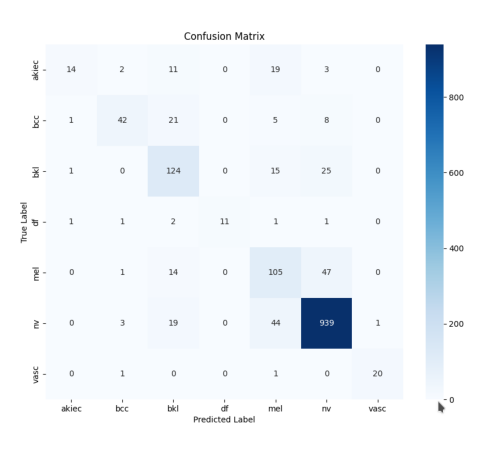

In [ ]:
img = Image.open('/Users/jortgommers/Desktop/Huidkanker-cnn-model-main/conf.png')

plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

### Analyse van de Confusion Matrix van het EfficientNet-B0-model voor Huidkankeridentificatie

De bovenstaande matrix toont de classificatie van verschillende typen huidkanker, waarbij de rijen de werkelijke labels en de kolommen de voorspelde labels weergeven. De klassen zijn als volgt:
- **akiec**: Actinische keratose en intra-epitheliale carcinoom
- **bcc**: Basaalcelcarcinoom
- **bkl**: Benigne keratosen (zoals seborrheïsche keratosen)
- **df**: Dermatofibroom
- **mel**: Melanoom
- **nv**: Naevi (moedervlekken)
- **vasc**: Vasculaire laesies

### Bevindingen

#### 1. Hoogste prestaties (diagonaal)
- Het model presteert bijzonder goed bij het correct classificeren van de **nv**-categorie (moedervlekken), met **939 correcte voorspellingen**. Dit zorgt voor een sterke bias van het model richting deze klasse, mogelijk vanwege een groter aantal voorbeelden in de trainingsdata.
- Voor **bkl** zijn er **124 correcte voorspellingen**, wat ook relatief goed is.

#### 2. Mislukkingen (off-diagonaal)
- **akiec** wordt soms verkeerd geclassificeerd als **bkl** (11 keer) en **mel** (19 keer). Dit kan komen doordat deze klassen op elkaar lijken.
- **mel** heeft aanzienlijke verwarring met **nv**: er zijn **44 gevallen** waarin melanoom ten onrechte als moedervlek wordt geclassificeerd. Dit kan problematisch zijn, omdat een verkeerde classificatie van melanoom ernstige gevolgen kan hebben.
- **df** en **vasc** hebben een zeer klein aantal waarnemingen in deze matrix, met wel een goede voorspellingen. Een grotere trainingsdata zet zal waarschijnlijk deze waarnemingen nog meer verbeteren.

#### 3. Algemene trends
- De grootste verwarring lijkt te ontstaan tussen **mel**, **nv**, en **bkl**. Dit is te verwachten, aangezien deze categorieën in een klinische setting erg op elkaar kunnen lijken.
- Klassen met minder data (zoals **df** en **vasc**) hebben een goede nauwkeurigheid, wat suggereert dat dit model goed werkt met scheve data.

Het model laat een goede prestatie zien, vooral bij het classificeren van moedervlekken (**nv**) en benigne keratosen (**bkl**). Er is ruimte voor verbetering, vooral bij  klassen zoals melanoom. Met een meer gebalanceerde grotere dataset en aangepaste strategieën kan het model verder worden verbeterd.


Als laatste word hieronder het model opgeslagen.

In [ ]:
model.save('/students/2023-2024/Thema07/rumen_reactor/test/skin_cancer_classifier.h5')

# Resnet50

### Waarom ResNet50?

Voor deze huidkankerclassificatie heb ik gekozen voor het **ResNet50** model. ResNet50 is een van de populaire modellen, die bekend staat om  het gebruik van residuele verbindingen. Deze verbindingen helpen bij het oplossen van het probleem van verdwijnende gradiënten in diepe netwerken, wat zorgt voor betere prestaties bij het trainen van zeer diepe modellen.

#### Redenen voor de keuze van ResNet50:

1. **Diepe architectuur met residuele verbindingen**:  
   ResNet50 maakt gebruik van residuele verbindingen die het mogelijk maken om heel diepe netwerken te trainen zonder dat er veel informatie verloren gaat. Vooral voor complexe taken zoals medische beeldclassificatie, waar een goede en diepgaande analyse van afbeeldingen vereist is.

2. **Sterk presteren bij complexe taken**:  
   Dankzij de diepere architectuur kan ResNet50 beter omgaan met de complexe patronen die vaak aanwezig zijn in medische beelden, zoals huidkankerafbeeldingen. Het model is in staat om fijne details te extraheren die mogelijk belangrijk zijn voor het correct classificeren van de afbeelding, zelfs wanneer deze details subtiel zijn.

3. **Probleem met verdwijnende gradiënten wordt opgelost**:  
   In diepe netwerken kunnen de gradiënten tijdens de backpropagation kleiner worden, wat het moeilijk maakt om de netwerkparameters te trainen. De residuele verbindingen in ResNet50 helpen dit probleem te voorkomen, wat resulteert in een sneller convergerend en beter presterend model.

4. **Beter voor grotere datasets**:  
   ResNet50 presteert uitstekend bij het werken met grotere datasets. De diepe architectuur kan veel informatie verwerken, waardoor het model in staat is om complexere patronen te leren. Dit maakt ResNet50 een geweldige keuze voor medische datasets die vaak groot en complex zijn.

#### Waarom ResNet50 kiezen boven andere modellen?

Als voorbeeld: je zou kunnen kiezen tussen **ResNet50** en een model zoals **VGG16**. Hoewel VGG16 eenvoudig te implementeren is, heeft het een veel eenvoudigere idee erachter die niet zo goed in staat is om diepere, complexere representaties van beelden te leren als ResNet50. Dit maakt ResNet50 een beter keuze voor ingewikkeldere classificatietaken, zoals huidkankerherkenning.

Aan de andere kant, **EfficientNetB0** kan een aantrekkelijker alternatief zijn vanwege de betere balans tussen snelheid en prestaties, vooral bij beperkte rekenkracht. Echter, voor taken waarbij diepe representaties en nauwkeurigheid essentieel zijn, zal ResNet50 waarschijnlijk betere resultaten leveren. Daarnaast is **EfficientNetB0** vaak beter geschikt voor kleinere datasets, waar een efficiëntere architectuur nodig is om overfitting te voorkomen en het model sneller te trainen.

#### Uitvoering buiten Jupyter Notebook  
Net zoals bij het gebruik van **EfficientNetB0**, kan het trainen van **ResNet50** op een lokale machine met beperkte rekenkracht een uitdaging zijn, vooral bij grotere datasets.




De onderstaande code wordt niet nader uitgelegd, aangezien deze praktisch identiek is aan de eerder besproken code. Het enige verschil is dat in plaats van het EfficientNetB0-model, nu wordt getraind met ResNet50. Verder zijn er geen unieke of specifieke wijzigingen doorgevoerd in de code voor deze modellen. Het doel is om te evalueren welk van de twee modellen, met exact dezelfde inputs en trainingsinstellingen, het beste presteert. De resultaten van deze vergelijking worden besproken in het kader van modelprestaties en accuratesse, zonder nadruk op aanpassingen in de implementatie.

In [ ]:
# Metadata inladen
metadata = pd.read_csv("/students/2023-2024/Thema07/rumen_reactor/test/HAM10000_metadata.csv")
image_dir_part1 = "/students/2023-2024/Thema07/rumen_reactor/test/images/part_1"
image_dir_part2 = "/students/2023-2024/Thema07/rumen_reactor/test/images/part_2"

metadata['image_path'] = metadata['image_id'].apply(
    lambda x: os.path.join(
        image_dir_part1 if os.path.exists(os.path.join(image_dir_part1, f"{x}.jpg")) else image_dir_part2,
        f"{x}.jpg"
    )
)
metadata = metadata[metadata['image_path'].apply(os.path.exists)]

In [ ]:
metadata.head()
metadata['age'].fillna((metadata['age'].mean()), inplace=True)

In [ ]:
train, test = train_test_split(metadata, test_size=0.15, stratify=metadata['dx'], random_state=42)
train, val = train_test_split(train, test_size=0.15, stratify=train['dx'], random_state=42)

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
).flow_from_dataframe(
    train, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32
)

In [ ]:
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    val, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32
)

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test, x_col='image_path', y_col='dx', target_size=(224, 224),
    class_mode='categorical', batch_size=32, shuffle=False
)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(7, activation='softmax', kernel_regularizer=l2(0.01))(x)
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50, 
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[early_stopping, reduce_lr],  
    verbose=1
)

### Trainingsresultaten per Epoch

Hieronder worden de resultaten van de training per epoch weergegeven, inclusief accuracy, loss, validatie-accuracy, validatie-loss en leersnelheid.

| Epoch | Train Accuracy | Train Loss | Val Accuracy | Val Loss | Learning Rate |
|-------|----------------|------------|--------------|----------|---------------|
| 1     | 49.34%         | 2.1189     | 11.20%       | 4.4808   | 1.0000e-04    |
| 2     | 70.47%         | 1.3445     | 2.04%        | 36.9670  | 1.0000e-04    |
| 3     | 74.59%         | 1.1077     | 66.88%       | 2.3637   | 1.0000e-04    |
| 4     | 76.32%         | 1.0378     | 69.07%       | 3.0746   | 1.0000e-04    |
| 5     | 77.11%         | 0.9330     | 76.04%       | 0.8635   | 1.0000e-04    |
| 6     | 79.55%         | 0.7938     | 68.99%       | 2.3399   | 1.0000e-04    |
| 7     | 79.36%         | 0.7936     | 78.70%       | 0.8170   | 1.0000e-04    |
| 8     | 82.44%         | 0.6794     | 80.50%       | 0.6927   | 1.0000e-04    |
| 9     | 84.74%         | 0.5756     | 77.21%       | 0.8724   | 1.0000e-04    |
| 10    | 84.16%         | 0.5787     | 62.02%       | 2.0115   | 1.0000e-04    |
| 11    | 85.29%         | 0.5465     | 72.36%       | 1.2817   | 1.0000e-04    |
| 12    | 84.69%         | 0.5610     | 75.41%       | 1.0948   | 1.0000e-04    |
| 13    | 86.15%         | 0.5157     | 83.63%       | 0.5966   | 1.0000e-04    |
| 14    | 87.60%         | 0.4557     | 84.18%       | 0.6171   | 1.0000e-04    |
| 15    | 88.04%         | 0.4345     | 67.03%       | 1.2982   | 1.0000e-04    |
| 16    | 89.65%         | 0.3777     | 73.77%       | 1.0623   | 1.0000e-04    |
| 17    | 89.16%         | 0.3861     | 81.99%       | 0.6651   | 1.0000e-04    |
| 18    | 88.08%         | 0.4038     | 78.00%       | 0.8925   | 1.0000e-04    |
| 19    | 92.38%         | 0.2977     | 82.46%       | 0.7794   | 2.0000e-05    |
| 20    | 93.00%         | 0.2769     | 66.33%       | 1.9090   | 2.0000e-05    |
| 21    | 93.79%         | 0.2648     | 77.68%       | 1.3304   | 2.0000e-05    |
| 22    | 94.19%         | 0.2492     | 81.28%       | 0.9357   | 2.0000e-05    |
| 23    | 94.45%         | 0.2418     | 72.59%       | 1.9008   | 2.0000e-05    |



### Analyse van Modelprestaties: ResNet50 vs EfficientNetB0

#### Vergelijking tussen ResNet50 en EfficientNetB0
##### 1. Trainingsresultaten
- **ResNet50** behaalde een **hoogste trainingsaccuratesse van 94.45%** met een **laagste train loss van 0.2418**.
- **EfficientNetB0** behaalde een **hoogste trainingsaccuratesse van 88.49%** met een **laagste train loss van 0.4151**.
- ResNet50 laat zien dat het een krachtiger model is met een grotere capaciteit om complexe patronen te leren tijdens de training.

##### 2. Validatieresultaten
- **ResNet50** behaalde een **hoogste validatieaccuratesse van 84.18%**, bijna gelijk aan die van EfficientNetB0.
- Echter, de **val loss van ResNet50** was **significant hoger** (bijv. 0.7794 in epoch 19) vergeleken met de **val loss van EfficientNetB0** (0.5600).
- Dit wijst erop dat ResNet50, ondanks de hogere trainingaccuracy, mogelijk **meer overfitting vertoont** omdat het minder goed generaliseert naar validatiedata.

##### 3. Vroegtijdige trainingsterminatie van EfficientNetB0
- Het lijkt erop dat **ResNet50 mogelijk te vroeg is gestopt met trainen**. Dit kan komt door de schommeling in waardes wat weer kan komen omdat het minder geschikt is voor kleinere datasets.
- Als dit model langer had getraind en meer data had, had het waarschijnlijk een betere generalisatie kunnen bereiken en de kloof met EfficientNetB0 kunnen dichten.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Analyse van Testprestaties: ResNet50 vs EfficientNetB0

## Vergelijking van Testresultaten
### ResNet50:
- **Testaccuratesse:** 82.70%
- Ondanks een hoge trainingsaccuratesse (94.45%) en validatieaccuratesse (85.59%), scoort ResNet50 lager op de testset dan EfficientNetB0. Dit kan wijzen op **overfitting**.

### EfficientNetB0:
- **Testaccuratesse:** 84%
- EfficientNetB0 presteert beter op de testset, ondanks een lagere trainingsaccuratesse (88.49%). Dit suggereert dat het model **beter generaliseert**.

---

## Analyse
1. **Overfitting in ResNet50:**
   - ResNet50 heeft een indrukwekkende trainingsaccuratesse, maar de lagere testaccuratesse toont aan dat het model moeite heeft met generalisatie. Dit komt mogelijk door de grotere modelcapaciteit, wat het risico op overfitting verhoogt.
   
2. **EfficientNetB0's balans tussen capaciteit en generalisatie:**
   - EfficientNetB0 is ontworpen als een lichter model met optimalisaties zoals depth scaling en width scaling. Hierdoor generaliseert het beter, ondanks een lagere trainingsaccuratesse.


In [ ]:
predictions = np.argmax(model.predict(test_gen), axis=-1)
true_labels = test_gen.classes

print(classification_report(true_labels, predictions, target_names=list(test_gen.class_indices.keys())))
conf_matrix = confusion_matrix(true_labels, predictions)


### Classificatie Rapport

| Class      | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| **akiec**  | 0.86      | 0.65   | 0.74     | 49      |
| **bcc**    | 0.83      | 0.70   | 0.76     | 77      |
| **bkl**    | 0.58      | 0.77   | 0.66     | 165     |
| **df**     | 0.55      | 0.71   | 0.62     | 17      |
| **mel**    | 0.55      | 0.62   | 0.58     | 167     |
| **nv**     | 0.94      | 0.89   | 0.92     | 1006    |
| **vasc**   | 1.00      | 0.73   | 0.84     | 22      |

---

#### Totale Prestatie

- **Accuracy:** 0.83 (1,503 voorbeelden)
- **Macro Gemiddelde:**
  - Precision: 0.76
  - Recall: 0.72
  - F1-Score: 0.73
- **Gewogen Gemiddelde:**
  - Precision: 0.85
  - Recall: 0.83
  - F1-Score: 0.83


### Analyse van de Resultaten

### 1. **Precision, Recall en F1-Score per Klasse:**

- **akiec** (actinische keratose) heeft een **hoge precision (0.86)**, wat betekent dat wanneer het model deze klasse voorspelt, het correct is in 86% van de gevallen. De **recall (0.65)** is  laag, wat betekent dat slechts 65% van de werkelijke gevallen van akiec correct werd gevonden door het model. Dit zegt dat het model moeite heeft om alle akiec gevallen te vinden, maar als het voorspelt, is het vaak correct. De **F1-score (0.74)** is een balans tussen precision en recall en geeft aan dat het model redelijk goed presteert, maar er is ruimte voor verbetering.
  
- **bcc** (basale celcarcinoom) heeft een goede performance met een **precision van 0.83** en **recall van 0.70**, wat betekent dat het model de meeste echte gevallen van bcc correct identificeert en met een goede mate van nauwkeurigheid. 

- **bkl** (benigne keratose) vertoont een andere dynamiek: het model heeft een **lage precision (0.58)** en een **hoge recall (0.77)**. Dit betekent dat het model veel gevallen van bkl correct identificeert, maar veel van de voorspellingen als bkl zijn incorrect. 

- **df** (dermatofibroom) heeft een **relatief lage precision (0.55)** en **recall (0.71)**, wat zegt dat het model moeite heeft om dermatiefibromen nauwkeurig te classificeren, hoewel het redelijk goed is in het vinden van de gevallen. atieven.

- **mel** (melanoom) heeft een **relatief lage precision (0.55)** en **recall (0.62)**, wat wijst op een lagere prestatie voor het model in het identificeren van melanoom. 

- **nv** (normale huid) heeft **uitstekende prestaties** met een **hoge precision (0.94)** en **recall (0.89)**. Het model is goed in het correct identificeren van normale huidgevallen en het correct vermijden van fout-positieven. 

- **vasc** (vasculaire laesies) heeft een **uitstekende precision (1.00)**, wat betekent dat alle voorspellingen van deze klasse correct zijn, maar de **recall (0.73)** is aanzienlijk lager, wat zeggt dat het model niet alle gevallen van vasculaire laesies correct identificeert. 



In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

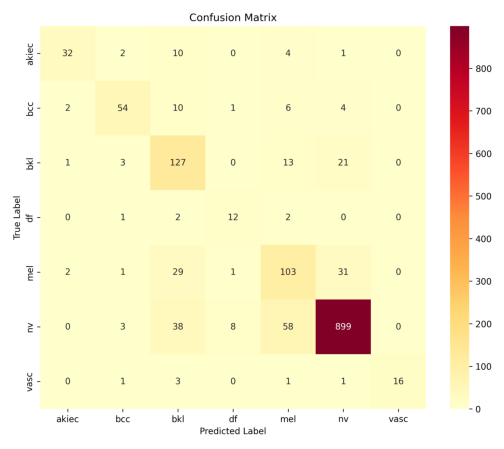

In [9]:
img = Image.open('/Users/jortgommers/Desktop/Huidkanker-cnn-model-main/confusion_matrix.png')

# Toon de afbeelding
plt.figure(figsize=(15, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

## Analyse van de Confusion Matrix van het ResNet50-model voor Huidkankeridentificatie

### 1. Hoogste prestaties (diagonaal)
- Het model presteert uitstekend bij het classificeren van **nv** (moedervlekken), met **899 correcte voorspellingen**. Dit zegt dat deze klasse goed wordt herkend, waarschijnlijk vanwege een grotere hoeveelheid representatieve data in de trainingsset.
- Voor **bkl** zijn er **127 correcte voorspellingen**, wat ook een goede resultaat is.

### 2. Mislukkingen (off-diagonaal)
- **mel** wordt verward met **nv** in **58 gevallen** en met **bkl** in **29 gevallen**. 
- **df** heeft slechts **12 correcte voorspellingen**, met enkele verwarringen met **mel** en **akiec**. Dit kan wijzen op een tekort aan data voor deze klasse.

### 3. Algemene trends
- De grootste verwarring doet zich voor tussen **mel**, **nv**, en **bkl**, wat mogelijk te wijten is aan hun visuele gelijkenissen.

In [ ]:
model.save('/students/2023-2024/Thema07/rumen_reactor/test/skin_cancer_classifier_resnet50.h5')

# Conclusie 

EfficientNetB0 en ResNet50 zijn twee van de meest gebruikte deep learning modellen voor het classificeren van huidafwijkingen, zoals akiec (voorstadia van huidkanker), bcc (basaalcelkanker), bkl (goedaardige huidvlekken), df (dermatofibroom), mel (melanoom), nv (moedervlekken), en vasc (vasculaire afwijkingen). Deze modellen hebben echter hun beperkingen, vooral als het gaat om de vereiste rekencapaciteit en CPU-kracht. Er zijn betere versies van deze modellen, zoals de geavanceerdere EfficientNet en ResNet varianten, maar de hoge kosten van de benodigde servers maken het moeilijk om deze te gebruiken voor mij.

Naast EfficientNetB0 en ResNet50 zijn er ook andere veelgebruikte modellen die ingezet kunnen worden voor dit type onderzoek. Voorbeelden hiervan zijn VGG16, InceptionV3, DenseNet121 en Xception. Deze modellen kunnen ook sterke prestaties leveren in beeldclassificatie, maar ze vereisen variërende hoeveelheden rekencapaciteit en geheugen. Toch bieden ze, net als EfficientNet en ResNet, veel potentieel voor het verbeteren van de nauwkeurigheid in dermatologische diagnostiek.

De huidige modellen kunnen, ondanks beperkte gegevens (zoals alleen leeftijd en locatie), nog steeds uitstekende prestaties leveren die zelfs sneller en nauwkeuriger zijn dan sommige dermatologen, die een nauwkeurigheid behalen tussen de 70% en 95%. Het zou bijvoorbeeld mogelijk zijn om de dataset uit te breiden naar 100.000 beelden, wat de nauwkeurigheid van de modellen aanzienlijk zou verbeteren.

De toepassingen van AI in dermatologie kunnen artsen helpen door sneller en efficiënter afwijkingen te identificeren, wat de werklast vermindert en artsen tijd bespaart. Bovendien kan AI de diagnostische nauwkeurigheid verhogen, wat zelfs kan leiden tot betere resultaten dan sommige van de beste artsen in Nederland. Met de juiste gegevens en training kunnen AI-modellen in de toekomst nauwkeurigheden van 98% of meer bereiken.

AI kan ook als hulpmiddel dienen in de vorm van een mobiele app voor patiënten die aarzelend zijn om naar de huisarts te gaan. Dit zou hen kunnen helpen bij het analyseren van symptomen voordat ze een arts raadplegen. Het is belangrijk te benadrukken dat de beslissing om AI als hulpmiddel te gebruiken altijd aan de gebruiker ligt, en het moet gezien worden als een aanvulling op, en niet een vervanging voor, professioneel medisch advies.

Hoewel AI momenteel nog niet op grote schaal wordt ingezet voor dermatologische diagnostiek in Nederland, biedt de technologie veel potentieel voor de toekomst. Met verbeterde datasets, krachtigere modellen en bredere acceptatie kan AI een waardevol hulpmiddel worden voor zowel huisartsen als patiënten.
